In [1]:
import numpy as np
import pandas as pd
from collections import Counter

# number of unique proteins: 250365
# number of trails whose expression levels are listed in protocolDetail section (protocol_expresslevel): 2824
# number of trails whose expression levels are listed in trailOutcom section (trail_expresslevel): 123327
# number of trails that have both protocol_expresslevel and trail_expresslevel: 0
# number of "expression & purified" in trail_his_status: 422615

In [2]:
target_data = pd.read_csv("target_protein.csv")

In [13]:
target_proteins_list = target_data['protein_name']

In [17]:
stat_target_proteins_dict = Counter(target_proteins_list)

In [18]:
len(stat_target_proteins_dict) # number of unique proteins

250365

In [29]:
unique_protein_list = str(stat_target_proteins_dict.keys()).split("dict_keys(['")[1]

In [32]:
unique_protein_list = unique_protein_list.split("\', \'")

In [35]:
species_list = []
for proteins in unique_protein_list:
    species = proteins.split(": ")[0]
    species_list.append(species)
stat_species_dict = Counter(species_list)

In [4]:
trail_data = pd.read_csv("trail_info&host&eb.csv")

/Users/liusifan/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,7,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
status_df = pd.DataFrame(columns = ['id','trail_status','stop_detail','his_status'])

In [6]:
status_df['id'] = trail_data['trail_id']
status_df['trail_status'] = trail_data['trail_status']
status_df['stop_detail'] = trail_data['trail_stopdes']
status_df['his_status'] = trail_data['trail_his_status']

In [8]:
trail_his_status_list = status_df['his_status']
trail_his_status_list_processed = []
for ele in trail_his_status_list:
    sta_string = ''
    ele = ele.split('{')[1].split('}')[0].split(',')
    for ind in range(len(ele)):
        e = ele[ind].split("': '")[1].split("'")[0]
        if ind != 0:
            sta_string = sta_string + '-' + e
        else:
            sta_string = e
    trail_his_status_list_processed.append(sta_string)
status_df['his_status'] = trail_his_status_list_processed

In [10]:
trail_data['trail_his_status'] = trail_his_status_list_processed

In [11]:
outpath = 'trail_info.csv'
trail_data.to_csv(outpath,sep=',',index=False,header=True)

In [9]:
outpath = 'status.csv'
status_df.to_csv(outpath,sep=',',index=False,header=True)

In [40]:
trail_data['protein_name'].isnull().value_counts() # 406099 trails have no protein names

False    555449
True     406099
Name: protein_name, dtype: int64

In [4]:
pro_exp_list = trail_data['protocol_expresslevel']

In [12]:
trail_data['protocol_expresslevel'].isnull().value_counts() # 2824 trails have expression levels in <protocolDetail> section

True     958724
False      2824
Name: protocol_expresslevel, dtype: int64

In [13]:
trail_data['protocol_expresslevel'].value_counts() # number of diiferent labels protocol expression level

H    1809
M     759
W     247
w       6
m       2
L       1
Name: protocol_expresslevel, dtype: int64

In [5]:
trail_data['trail_expresslevel'].isnull().value_counts() #123327 trails have expression levels in <trailOutcome> section

True     838221
False    123327
Name: trail_expresslevel, dtype: int64

In [6]:
trail_data['trail_expresslevel'].value_counts() 

0.0      44123
100.0    24248
67.0     14821
90.0      9774
80.0      5969
30.0      5953
33.0      4484
60.0      3970
40.0      2201
20.0      1600
15.0      1442
10.0      1423
25.0       894
5.0        872
70.0       854
50.0       623
35.0        50
2.0         21
1.0          3
167.0        1
3.0          1
Name: trail_expresslevel, dtype: int64

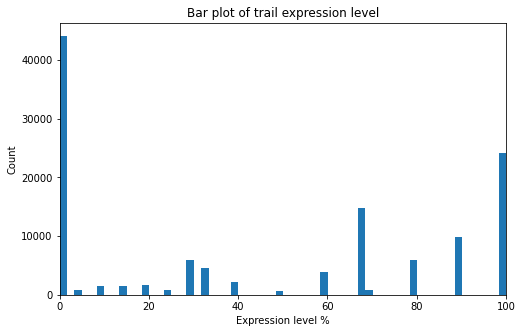

In [5]:
import matplotlib.pyplot as plt
trail_explev_distribution = trail_data['trail_expresslevel']
x1 = trail_explev_distribution.to_numpy()
plt.figure(figsize=(8,5))
plt.hist(x1, bins=100)
plt.title('Bar plot of trail expression level')
plt.ylabel('Count')
plt.xlabel('Expression level %')
plt.xlim(0, 100)
plt.show()

In [62]:
sub_df = trail_data[trail_data['protocol_expresslevel'].notnull()]

In [64]:
sub_sub_df = sub_df[sub_df['trail_expresslevel'].notnull()]

In [65]:
sub_sub_df # no trail has both protocol expression level and trail expression level, merge protocol_expresslevel and 

,trail_id,protein_name,lab,target_status,source_organism,database_info,trail_status,trail_stopdes,trail_his_status,trail_protocol_info,protocol_expresslevel,trail_expresslevel


# no trail has both protocol expression level and trail expression level, merge protocol_expresslevel and trail_expresslevel into one column, how to determin threshold for trail_expresslevel to convert percent into letter

In [7]:
trail_data['trail_status'].value_counts() 

work stopped                        181220
diffraction-quality crystals        177530
purified                            177212
cloned                               99351
expressed                            91050
selected                             80312
soluble                              68163
expression tested                    24668
crystallized                         23970
in PDB                               15718
diffraction                           7808
mass spec verified                    4899
crystal structure                     4498
native diffraction-data               2890
HSQC satisfactory                     1446
NMR structure                          290
phasing diffraction-data               193
membrane protein solubilized           144
NMR assigned                            90
biological assay                        73
EM images                               10
biophysical analysis                     9
EM fitted model                          2
test target

In [4]:
trail_his_status_list = trail_data['trail_his_status']

In [49]:
trail_his_status_list_processed = []
for ele in trail_his_status_list:
    sta_string = ''
    ele = ele.split('{')[1].split('}')[0].split(',')
    for ind in range(len(ele)):
        e = ele[ind].split("': '")[1].split("'")[0]
        if ind != 0:
            sta_string = sta_string + '-' + e
        else:
            sta_string = e
    trail_his_status_list_processed.append(sta_string)


In [53]:
trail_his_status_dict = Counter(trail_his_status_list_processed)

In [54]:
len(trail_his_status_dict)

600

In [4]:
trail_his_status_list = trail_data['trail_his_status']
expression_bool = []
for ele in trail_his_status_list:
    if 'expressed' in ele or 'expression tested' in ele:
        expression_bool.append(1)
    else:
        expression_bool.append(0)

In [5]:
expression_bool[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [7]:
trail_data['expression_bool'] = expression_bool

In [8]:
outputpath='trail_info&host&eb.csv'
trail_data.to_csv(outputpath,sep=',',index=False,header=True)

In [61]:
from pandas import Series, DataFrame
trail_his_status_d = dict(sorted(trail_his_status_dict.items(), key=lambda x: x[1], reverse=True))
trail_his_status_df = pd.DataFrame(pd.Series(trail_his_status_d),columns = ['count'])
trail_his_status_df = trail_his_status_df.reset_index().rename({'index':'type'})
outputpath='trail_his_status_df.csv'
trail_his_status_df.to_csv(outputpath,sep=',',index=False,header=True)

In [22]:
sub_sub_df = list(trail_data[trail_data['trail_expresslevel'].notnull()]['trail_his_status'])

In [26]:
num = 0
for i in range(len(sub_sub_df)):
    if 'expressed' in sub_sub_df[i] and 'purified' in sub_sub_df[i]:
        num += 1
        continue
    if 'expression tested ' in sub_sub_df[i] and 'purified' in sub_sub_df[i]:
        num += 1

In [27]:
num

32418

In [25]:
len(sub_sub_df)

123327

In [ ]:
# number of "expression & purified" in trail_his_status: 422615

In [30]:
protocol_data = pd.read_csv("protocol_info.csv")

In [33]:
protocol_in_trial = list(trail_data['trail_protocol_info'])

In [49]:
protocol_dict = dict(zip(protocol_data['protocol_id'],protocol_data['host']))

In [52]:
trail_host_list = []
for ind in range(len(protocol_in_trial)):
    pro_id = re.findall(r"'expression': '(\w)'",protocol_in_trial[ind])
    if pro_id != []:
        trail_host_list.append(protocol_dict[pro_id[0]])
    else:
        trail_host_list.append('NA')

In [35]:
sd = "{'other': None,'expression': 'expression_2', 'selection':'selec_1'}"

In [48]:
import re
re.findall(r"'expression': '(\w+)'", sd, re.M)

['expression_2']

In [53]:
len(trail_host_list)

961548

In [57]:
Counter(trail_host_list)

Counter({'NA': 961196, nan: 49, 'e. coli': 303})

In [58]:
trail_data['host_info'] = trail_host_list

In [64]:
j= 0 
for i in trail_data['host_info']:
    j += 1
    if i == 'e. coli':
        print(j)

933248
933272
933366
933514
933515
933516
933517
933707
935040
935585
935593
935600
935627
935631
935633
935636
935639
935651
935666
935671
935672
935674
935675
935684
935697
935698
935703
935705
935733
935746
935748
935765
935766
935769
935770
935773
935774
935834
936115
936710
936714
937266
937273
937339
937350
937383
938930
939159
939175
939347
939410
939630
939679
939789
939948
939992
940099
940138
940145
940148
940151
940152
940164
940180
940181
940196
940205
940221
940227
940228
940232
940233
940242
940246
940250
940251
940252
940253
940254
940255
940260
940261
940262
940270
940272
940280
940284
940285
940313
940322
940326
940327
940334
940342
940344
940346
940350
940355
940363
940376
940380
940385
941962
941968
942177
942317
942647
943743
943749
943965
944000
944030
944034
944038
944108
944241
944787
946270
946277
946278
946281
946282
946283
946284
946287
946288
946290
946296
946301
946302
946303
946304
946306
946307
946308
946309
946310
946311
946312
946314
946316
946326
946330

In [59]:
outputpath='trail_info&host.csv'
trail_data.to_csv(outputpath,sep=',',index=False,header=True)

In [65]:
sequence_df = pd.read_csv("trail_sequence.csv")
trailid_list = list(sequence_df['index'])
sequence_dict = dict(zip(sequence_df['index'],sequence_df['sequence']))

with open('sequences_for_esm.fasta','w') as fa:
    for ids in trailid_list:
        fa.write('>'+ids)
        fa.write('\r\n')
        fa.write(sequence_dict[ids])
        fa.write('\r\n')


In [1]:
import numpy as np
import pandas as pd

In [2]:
status_df = pd.read_csv("status_symbol.csv")

/Users/liusifan/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
his_sta = ['purified','crystallized','diffraction','in PDB']

In [4]:
status_df['symbol'] = status_df.apply(lambda _: '', axis=1)
status_df['reason'] = status_df.apply(lambda _: '', axis=1)

In [10]:
status_df[:2]

,id,trail_status,stop_detail,his_status,symbol,reason
0,ATCG3D-ATCG3D_1-1,work stopped,NaN,selected-cloned-work stopped,-1,work stoped at expression step
1,ATCG3D-ATCG3D_10-1,work stopped,NaN,selected-cloned-work stopped,-1,work stoped at expression step


In [7]:
stop_list = ['selected','selected-work stopped','other-selected-work stopped','other-selected',
             'cloned','work stopped','']

In [21]:
for ind, row in status_df.iterrows():
    if row['stop_detail'] == 'sequencing failed' or row['stop_detail'] == 'cloning failed':
        row['symbol'] = -1
        row['reason'] = 'stoped before expression, stop detail'
        continue
    
    if row['stop_detail'] == 'expression failed':
        row['symbol'] = 0
        row['reason'] = 'expression failed, stop detail'
        continue

    if 'cloned-work stopped' in row['his_status']:
        row['symbol'] = 0
        row['reason'] = 'work stoped at expression step'
        continue
        
    if 'expressed' in row['his_status'] or 'expression tested' in row['his_status']:
        if row['stop_detail'] != 'expression failed':
            row['symbol'] = 1
            row['reason'] = 'expressed in his status'
            continue

    if 'expressed' not in row['his_status'] and 'expression tested' not in row['his_status']:
        if row['his_status'] in stop_list:
            row['symbol'] = -1
            row['reason'] = 'no expression or further step in his_status'
            continue

        else:
            if 'purified' in row['his_status'] or 'crystallized' in row['his_status'] or 'diffraction' in row['his_status'] or 'in PDB' in row['his_status']:
                if row['stop_detail'] != 'expression failed':
                    row['symbol'] = 1
                    row['reason'] = 'no expression but purified ect'
                               

In [9]:
for ind, row in status_df.iterrows():
    if row['stop_detail'] == 'sequencing failed' or row['stop_detail'] == 'cloning failed':
        row['symbol'] = -1
        row['reason'] = 'stoped before expression, stop detail'
        continue
    
    if row['stop_detail'] == 'expression failed':
        row['symbol'] = 0
        row['reason'] = 'expression failed, stop detail'
        continue

    if 'cloned-work stopped' in row['his_status']:
        row['symbol'] = -1
        row['reason'] = 'work stoped at expression step'
        continue
        
    if 'expressed' in row['his_status'] or 'expression tested' in row['his_status']:
        if row['stop_detail'] != 'expression failed':
            if not row['his_status'].endswith('expressed') or not row['his_status'].endswith('expression tested') or not row['his_status'].endswith('expression tested-work stopped') or not row['his_status'].endswith('expressed-work stopped'):
                row['symbol'] = 1
                row['reason'] = 'expressed in his status'
                continue

    if 'expressed' not in row['his_status'] and 'expression tested' not in row['his_status']:
        if row['his_status'] in stop_list:
            row['symbol'] = -1
            row['reason'] = 'no expression or further step in his_status'
            continue

        else:
            if 'purified' in row['his_status'] or 'crystallized' in row['his_status'] or 'diffraction' in row['his_status'] or 'in PDB' in row['his_status'] or 'soluble' in row['his_status'] or 'mass spec verified' in row['his_status'] or 'HSQC satisfactory' in row['his_status'] or 'biological assay' in row['his_status']:
                if row['stop_detail'] != 'expression failed':
                    row['symbol'] = 1
                    row['reason'] = 'no expression but purified ect'

In [11]:
from collections import Counter
Counter(status_df['symbol'])

Counter({-1: 171884, 1: 649623, '': 99224, 0: 40817})

In [26]:
output_path = 'status_symbol.csv'
status_df.to_csv(output_path,sep=',',index=False,header=True)

In [12]:
trail_df = pd.read_csv("trail_info.csv")

/Users/liusifan/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,7,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
ecoli_lab_list = ['NESG','JCSG','TB','MCSG','BSGI','BSGC']

In [23]:
sub0_df = trail_df[trail_df.host_info == 'e. coli']

In [17]:
sub1_df = trail_df[trail_df.lab == 'NESG']

In [18]:
sub2_df = trail_df[trail_df.lab == 'JCSG']

In [19]:
sub3_df = trail_df[trail_df.lab == 'TB']

In [20]:
sub4_df = trail_df[trail_df.lab == 'MCSG']

In [21]:
sub5_df = trail_df[trail_df.lab == 'BSGI']

In [22]:
sub6_df = trail_df[trail_df.lab == 'BSGC']

In [27]:
ecoli_trial_df = sub0_df
ecoli_trial_df = ecoli_trial_df.append(sub1_df)
ecoli_trial_df = ecoli_trial_df.append(sub2_df)
ecoli_trial_df = ecoli_trial_df.append(sub3_df)
ecoli_trial_df = ecoli_trial_df.append(sub4_df)
ecoli_trial_df = ecoli_trial_df.append(sub5_df)
ecoli_trial_df = ecoli_trial_df.append(sub6_df)

In [108]:
len(sub3_df)

5226

In [29]:
ecoli_trial_df['host_info'] = ecoli_trial_df.apply(lambda _: 'e. coli', axis=1)

In [30]:
status_df[:2]

,id,trail_status,stop_detail,his_status,symbol,reason
0,ATCG3D-ATCG3D_1-1,work stopped,NaN,selected-cloned-work stopped,-1,work stoped at expression step
1,ATCG3D-ATCG3D_10-1,work stopped,NaN,selected-cloned-work stopped,-1,work stoped at expression step


In [32]:
status_df = status_df.drop(columns=['trail_status','stop_detail','his_status'])

In [33]:
ecoli_trial_df[:2]

,trail_id,protein_name,lab,target_status,source_organism,database_info,trail_status,trail_stopdes,trail_his_status,trail_protocol_info,protocol_expresslevel,trail_expresslevel,host_info,expression_bool
933247,SSGCID-BaheA.00553.a-1,recombination protein RecR,University of Washington Protein Production Group,expressed,Bartonella henselae,"{'OrthoMCL': 'OG5_132580', 'PATRIC ID': 'fig|2...",expressed,NaN,selected-cloned-expressed,"{'expression': '8', 'PCR': '15', 'selection': ...",NaN,NaN,e. coli,1
933271,SSGCID-BaheA.00720.b-1,TrwD protein,Beryllium,diffraction,Bartonella henselae,"{'OrthoMCL': 'OG5_130713', 'PATRIC ID': 'fig|2...",diffraction,NaN,selected-cloned-expression tested-expressed-so...,"{'crystallization': '100', 'PCR': '16', 'cloni...",NaN,NaN,e. coli,1


In [35]:
ecoli_trial_df = ecoli_trial_df.drop(columns=['expression_bool'])

In [36]:
ecoli_trial_df = ecoli_trial_df.rename(columns={'trail_id':'id'})
ecoli_bool_df = pd.merge(ecoli_trial_df,status_df,on='id')

In [37]:
len(ecoli_bool_df)

255989

In [38]:
ecoli_bool_df[:2]

,id,protein_name,lab,target_status,source_organism,database_info,trail_status,trail_stopdes,trail_his_status,trail_protocol_info,protocol_expresslevel,trail_expresslevel,host_info,symbol,reason
0,SSGCID-BaheA.00553.a-1,recombination protein RecR,University of Washington Protein Production Group,expressed,Bartonella henselae,"{'OrthoMCL': 'OG5_132580', 'PATRIC ID': 'fig|2...",expressed,NaN,selected-cloned-expressed,"{'expression': '8', 'PCR': '15', 'selection': ...",NaN,NaN,e. coli,1,expressed in his status
1,SSGCID-BaheA.00720.b-1,TrwD protein,Beryllium,diffraction,Bartonella henselae,"{'OrthoMCL': 'OG5_130713', 'PATRIC ID': 'fig|2...",diffraction,NaN,selected-cloned-expression tested-expressed-so...,"{'crystallization': '100', 'PCR': '16', 'cloni...",NaN,NaN,e. coli,1,expressed in his status


In [39]:
output_path = 'ecoli_trials.csv'
ecoli_bool_df.to_csv(output_path,sep=',',index=False,header=True)

In [40]:
Counter(ecoli_bool_df['symbol'])

Counter({1: 141921, '': 43483, -1: 70585})

In [41]:
JCSG_df = pd.read_csv('JSCG_esm_reps.csv')

In [59]:
tem_df = pd.DataFrame(columns=['id','lab'])
tem_df['id'] = ecoli_bool_df.iloc[:,0]

In [61]:
tem_df['lab'] = [e.split('-')[0] for e in tem_df['id']]

In [64]:
tem_df = tem_df[tem_df.lab=='JCSG']

In [71]:
tem_df = tem_df.drop(columns=['lab'])

In [72]:
JCSG_selected_df = pd.merge(tem_df,JSCG_df,on='id')

In [73]:
JCSG_selected_df.to_csv('JCSG_esm_reps.csv',sep=',',header=True,index=False)

In [74]:
df = pd.read_csv('MCSG_esm_reps.csv')
tem_df = pd.DataFrame(columns=['id','lab'])
tem_df['id'] = ecoli_bool_df.iloc[:,0]
tem_df['lab'] = [e.split('-')[0] for e in tem_df['id']]
tem_df = tem_df[tem_df.lab=='MCSG']
tem_df = tem_df.drop(columns=['lab'])
MCSG_selected_df = pd.merge(tem_df,df,on='id')

In [76]:
output_path = 'MCSG_selected.csv'
MCSG_selected_df.to_csv(output_path,sep=',',index=False,header=True)

In [77]:
df = pd.read_csv('NESG_esm_reps.csv')
tem_df = pd.DataFrame(columns=['id','lab'])
tem_df['id'] = ecoli_bool_df.iloc[:,0]
tem_df['lab'] = [e.split('-')[0] for e in tem_df['id']]
tem_df = tem_df[tem_df.lab=='NESG']
tem_df = tem_df.drop(columns=['lab'])
NESG_selected_df = pd.merge(tem_df,df,on='id')

In [79]:
df = pd.read_csv('TB_esm_reps.csv')
tem_df = pd.DataFrame(columns=['id','lab'])
tem_df['id'] = ecoli_bool_df.iloc[:,0]
tem_df['lab'] = [e.split('-')[0] for e in tem_df['id']]
tem_df = tem_df[tem_df.lab=='TB']
tem_df = tem_df.drop(columns=['lab'])
TB_selected_df = pd.merge(tem_df,df,on='id')

In [81]:
SSGCID_selected_df = pd.read_csv('SSGCID_esm_reps.csv')

In [101]:
BSGI_selected_df = pd.read_csv('BSGI_esm_reps.csv')

In [102]:
BSGC_selected_df = pd.read_csv('BSGC_esm_reps.csv')

In [107]:
len(TB_selected_df)

5226

In [105]:
sub_total_df = pd.concat([SSGCID_selected_df,NESG_selected_df,JCSG_selected_df,TB_selected_df,MCSG_selected_df,BSGI_selected_df,BSGC_selected_df])

In [106]:
len(sub_total_df)

255966

In [109]:
output = 'esm_reps.csv'
sub_total_df.to_csv(output,sep=',',header=True,index=False)

In [2]:
reps_df = pd.read_csv('esm_reps.csv')

In [3]:
ecoli_bool_df = pd.read_csv('ecoli_trials.csv')
ecoli_bool_df = ecoli_bool_df.iloc[:,[0,13,14]]

/Users/liusifan/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
tem_ss_df = ecoli_bool_df.iloc[0:303,:]
reps_ss_df = reps_df[reps_df.lab=='SSGCID']
com_ss_df = pd.merge(reps_ss_df,tem_ss_df, on='id')

tem_nesg_df = ecoli_bool_df.iloc[302:133552,:]
reps_nesg_df = reps_df[reps_df.lab=='NESG']
com_nesg_df = pd.merge(reps_nesg_df,tem_nesg_df, on='id')

tem_jcsg_df = ecoli_bool_df.iloc[133550:177109,:]
reps_jcsg_df = reps_df[reps_df.lab=='JCSG']
com_jcsg_df = pd.merge(reps_jcsg_df,tem_jcsg_df, on='id')

tem_tb_df = ecoli_bool_df.iloc[177109:182335,:]
reps_tb_df = reps_df[reps_df.lab=='TB']
com_tb_df = pd.merge(reps_tb_df,tem_tb_df, on='id')

tem_mcsg_df = ecoli_bool_df.iloc[182335:253020,:]
reps_mcsg_df = reps_df[reps_df.lab=='MCSG']
com_mcsg_df = pd.merge(reps_mcsg_df,tem_mcsg_df, on='id')

In [48]:
reps_bsgi_df = reps_df[reps_df.lab=='BSGI']
reps_bsgi_df1 = reps_bsgi_df.sort_values(by=['id'])
com_bsgi_df = reps_bsgi_df1
com_bsgi_df['symbol'] = ecoli_bool_df.iloc[253020:254953,1]
com_bsgi_df['reason'] = ecoli_bool_df.iloc[253020:254953,2]

In [53]:
com_bsgi_df = com_bsgi_df.reset_index().drop(columns=['index'])

In [19]:
tem_bsgc_df = ecoli_bool_df.iloc[254953:255989,:]
reps_bsgc_df = reps_df[reps_df.lab=='BSGC']
com_bsgc_df = pd.merge(reps_bsgc_df,tem_bsgc_df, on='id')

In [33]:
esm_reps_bool_df = com_ss_df.append(com_nesg_df)

In [55]:
esm_reps_bool_df = esm_reps_bool_df.append(com_jcsg_df)
esm_reps_bool_df = esm_reps_bool_df.append(com_tb_df)
esm_reps_bool_df = esm_reps_bool_df.append(com_mcsg_df)
esm_reps_bool_df = esm_reps_bool_df.append(com_bsgi_df)
esm_reps_bool_df = esm_reps_bool_df.append(com_bsgc_df)

In [56]:
esm_reps_bool_df.to_csv('esm_reps_bool.csv',sep=',',header=True,index=False)

In [43]:
com_bsgi_df = com_bsgi_df.drop(columns=['index'])

In [55]:
names = locals()
for i in range(26):
    pre_ind = i * 10000
    if i == 25:
        pos_ind = i * 10000 + 5974
    else:
        pos_ind = i * 10000 + 10000
    
    names['sub_seq_df' + str(i)] = sub_seq_df[pre_ind:pos_ind]
    
    trailid_list = list(names['sub_seq_df' + str(i)]['index'])
    
    sequence_dict = dict(zip(names['sub_seq_df' + str(i)]['index'],names['sub_seq_df' + str(i)]['sequence']))
    
    with open('subset' + str(i) + '.fasta','w') as fa:
        for ids in trailid_list:
            fa.write('>'+ids)
            fa.write('\r\n')
            fa.write(sequence_dict[ids])
            fa.write('\r\n')
    

In [56]:
names = locals()
for i in range(52):
    pre_ind = i * 5000
    if i == 51:
        pos_ind = i * 5000 + 974
    else:
        pos_ind = i * 5000 + 5000
    
    names['sub_seq_df' + str(i)] = sub_seq_df[pre_ind:pos_ind]
    
    trailid_list = list(names['sub_seq_df' + str(i)]['index'])
    
    sequence_dict = dict(zip(names['sub_seq_df' + str(i)]['index'],names['sub_seq_df' + str(i)]['sequence']))
    
    with open('subset' + str(i) + '.fasta','w') as fa:
        for ids in trailid_list:
            fa.write('>'+ids)
            fa.write('\r\n')
            fa.write(sequence_dict[ids])
            fa.write('\r\n')
    

In [57]:
names = locals()
for i in range(256):
    pre_ind = i * 1000
    if i == 255:
        pos_ind = i * 1000 + 974
    else:
        pos_ind = i * 1000 + 1000
    
    names['sub_seq_df' + str(i)] = sub_seq_df[pre_ind:pos_ind]
    
    trailid_list = list(names['sub_seq_df' + str(i)]['index'])
    
    sequence_dict = dict(zip(names['sub_seq_df' + str(i)]['index'],names['sub_seq_df' + str(i)]['sequence']))
    
    with open('/Users/liusifan/Desktop/Machine_learning/worksheets-master/xml_practice/sub_seq_1000/subset' + str(i) + '.fasta','w') as fa:
        for ids in trailid_list:
            fa.write('>'+ids)
            fa.write('\r\n')
            fa.write(sequence_dict[ids])
            fa.write('\r\n')

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
reps_df = pd.read_csv('esm_reps_bool.csv')

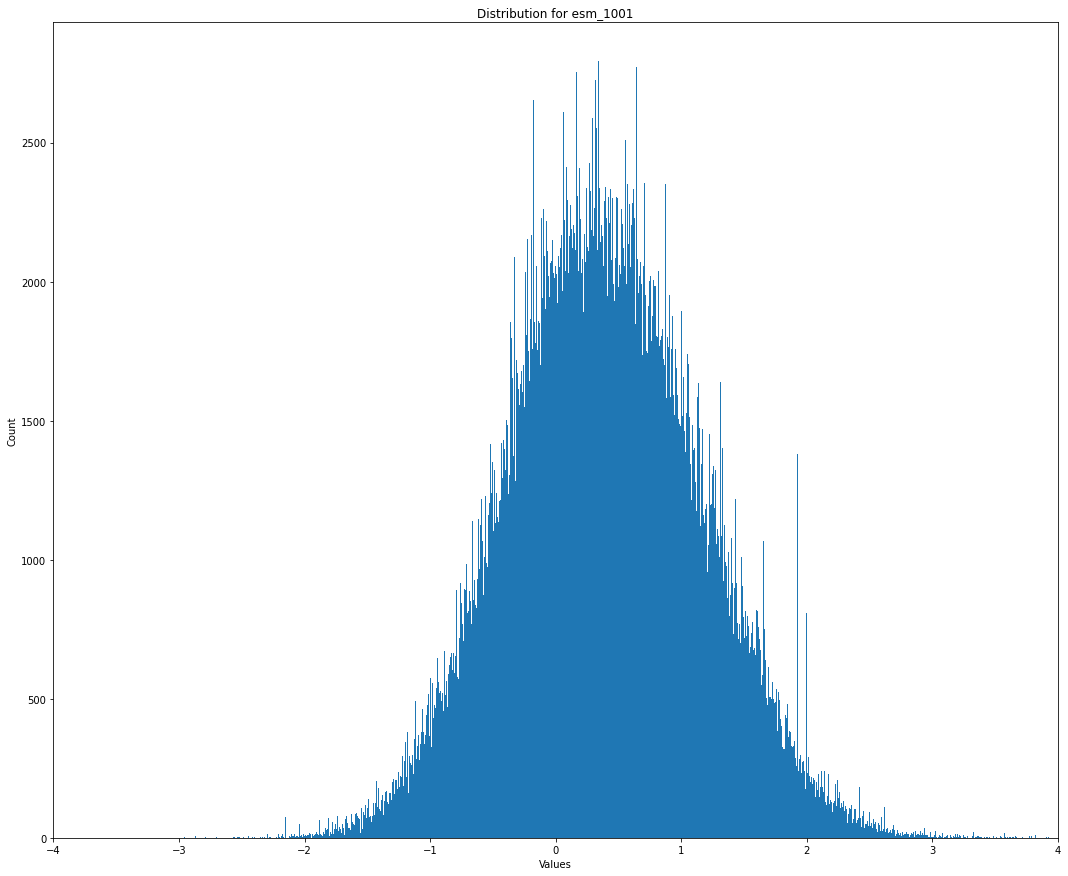

In [6]:
esm_distribution = reps_df['esm_1001']
x1 = esm_distribution.to_numpy()
plt.figure(figsize=(18,15))
plt.hist(x1, bins=1000)
plt.title('Distribution for esm_1001')
plt.ylabel('Count')
plt.xlabel('Values')
plt.xlim(-4, 4)
plt.show()
#fig=plt.gcf()
#fig.savefig('mood value of dataset for CML.jpg')

In [1]:
import pandas as pd
df = pd.read_csv('trail_info.csv')

/Users/liusifan/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,7,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
sub_df = df[df.trail_stopdes == 'expression failed']
len(sub_df)

40817

In [4]:
lab_list = sub_df['lab']

In [7]:
from collections import Counter
Counter(lab_list)

Counter({'CESG': 3900,
         'CHTSB': 8,
         'UCL': 395,
         'JCVI': 9912,
         'UVA': 9,
         'UT': 6,
         'NU': 140,
         'AECOM': 26210,
         'ANL': 32,
         'MPP': 28,
         'Dumont': 5,
         'Wiener': 1,
         'Malkowski': 1,
         'BNL': 42,
         'CELLMAT': 82,
         'SECSG': 45,
         'TMPC': 1})

In [8]:
protocol_list = sub_df['trail_protocol_info']
protocol_list[:10]

3463    {'expression': 'Combined_Small_Scale_Expressio...
3464                   {'selection': 'Inactive Protocol'}
3474    {'cloning': 'Inactive Protocol', 'selection': ...
3476                   {'selection': 'Inactive Protocol'}
3477    {'cloning': 'Inactive Protocol', 'selection': ...
3479    {'cloning': 'Inactive Protocol', 'selection': ...
3484    {'cloning': 'Inactive Protocol', 'selection': ...
3493    {'expression': 'Combined_Small_Scale_Expressio...
3499                   {'selection': 'Inactive Protocol'}
3538    {'expression': 'Combined_Small_Scale_Expressio...
Name: trail_protocol_info, dtype: object

In [13]:
protocol_list = protocol_list.reindex()

In [16]:
c = Counter(protocol_list)

304

In [36]:
import re
l = []
for ele in protocol_list:
    if "expression" in ele:
        #pro_exp = re.findall(r"'expression': (\w+)",ele, re.M)
        l.append(ele)

In [75]:
l = [None for x in range(40817)]
i = 0
for ele in protocol_list:
    sta_string = ''
    ele = ele.split('{')[1].split('}')[0].split(',')
    for e in ele:
        if "'expression':" in e:
            p = e.split(":")[1].split("'")[1]
            l[i] = p
            break
    i += 1

In [76]:
Counter(l)

Counter({'Combined_Small_Scale_Expression_Testing_Growth_Purification_V2.0.0': 545,
         None: 1297,
         'Small_Scale_Expression_Testing_V2.0.0': 1134,
         'SMALL-SCALE CELL-FREE SCREENING PROTOCOL v.4.1.1': 5,
         'SMALL-SCALE EXPRESSION TESTING v5.0.0': 3,
         'SMALL-SCALE SCREENING (N)-HIS TAG PROTOCOL V.3.0.0': 417,
         'SMALL-SCALE EXPRESSION TESTING V.3.0.0': 518,
         'Cell_Free_GST_Tag_V2.0.0': 2,
         'Cell_Free_His_Tag_V2.0.0': 36,
         'SMALL-SCALE SCREENING (N)-GST TAG PROTOCOL V.3.0.0': 93,
         'exp1': 8,
         'standard expression_ANL': 822,
         'CSG-004_Transformation': 9657,
         'UTSW_standard expression': 1,
         'NU_native_expression': 3,
         'JCVI_OverExpression_HT_protocol': 1,
         'WU_native_soluble_expression_1': 2,
         'NU_SelMet_expression': 6,
         'SS Expression and Purification': 22990,
         'Large-Scale Native LEX48 Expression': 233,
         'LEX48 PASM-5052 Large Scale Ex

In [78]:
sub_df['protocol'] = l

<ipython-input-78-bb76aa055a6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['protocol'] = l


In [77]:
len(l)

40817

In [79]:
pdf = pd.read_csv('protocol_info.csv')

In [92]:
from pandas import Series, DataFrame
subp_d = dict(sorted(Counter(l).items(), key=lambda x: x[1], reverse=True))
subp_df = pd.DataFrame(pd.Series(subp_d),columns = ['count'])
subp_df = subp_df.reset_index().rename({'index':'type'})
#outputpath='trail_his_status_df.csv'
#trail_his_status_df.to_csv(outputpath,sep=',',index=False,header=True)

In [93]:
subp_df

,index,count
0,SS Expression and Purification,22990
1,CSG-004_Transformation,9657
2,None,1297
3,Small_Scale_Expression_Testing_V2.0.0,1134
4,standard expression_ANL,822
5,BEVS Small Scale Expression Low MOI with Kifun...,637
6,Combined_Small_Scale_Expression_Testing_Growth...,545
7,SMALL-SCALE EXPRESSION TESTING V.3.0.0,518
8,SMALL-SCALE SCREENING (N)-HIS TAG PROTOCOL V.3...,417
9,LEX48 PASM-5052 Large Scale Expression,407


In [113]:
host_l = []
hl = pdf['host'].tolist()
pl = pdf['protocol_id'].tolist()
for s in l:
    if s != None:
        #subdf = pdf[pdf.protocol_id==s]
        try:
            ind = pl.index(s)
            host_l.append(hl[ind])
        except:
            host_l.append(None)
    else:
        host_l.append(None)
    
        

In [123]:
l3 = ['bl21','de3']
host_l1 = ['e. coli' if i in l3 else i for i in host_l]

In [124]:
Counter(host_l1)

Counter({'e. coli': 25999,
         None: 11666,
         'cell-free': 70,
         'cellfree': 510,
         's. cerevisiae': 15,
         nan: 1379,
         '293-f': 330,
         'sf9': 847,
         'b834': 1})

In [125]:
sub_df['host'] = host_l1

<ipython-input-125-d8e35042a7c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['host'] = host_l1


In [127]:
ecoli_subdf = sub_df[sub_df.host=='e. coli']

In [131]:
ecoli_subdf.to_csv('0_ecoli_trials.csv',sep=',',header=True,index=False)

In [130]:
ecoli_subdf = ecoli_subdf.drop(columns = ['host_info','trail_protocol_info'])

In [133]:
sub_df = sub_df.drop(columns = ['host_info','trail_protocol_info'])

In [134]:
sub_df.to_csv('0_trials.csv',sep=',',header=True,index=False)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('0_ecoli_trials.csv')

In [4]:
ids_0_df = pd.DataFrame(columns=['id'])
ids_0_df['id'] = df['trail_id']

In [5]:
len(ids_0_df)

25999

In [6]:
ids_0_df.to_csv('ids_0.csv',sep=',',header=True,index=False)

In [7]:
df = pd.read_csv('0_trials.csv')
ids_0_df = pd.DataFrame(columns=['id'])
ids_0_df['id'] = df['trail_id']
ids_0_df.to_csv('ids_0.csv',sep=',',header=True,index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('esm_reps_bool.csv')
df.loc[df['symbol'].isnull(), 'symbol'] = -1
df.to_csv('esm_rep&bool.csv',sep=',',header=True,index=False)

In [3]:
['sfg']

['sfg']

In [4]:
l = ['-'.join(list('sfg'))]

In [5]:
l

['s-f-g']